## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/content/Task (2) Dataset.csv') #read data
df.shape

(66639, 9)

In [63]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [64]:
df.tail()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218
66638,Riyadh,2023-12-15 07:01:30,0,15,39.5,5.2,0,56.126417,54.886055


In [65]:
df.sample()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
4843,Al-ain,2023-08-17 03:01:30,3,0,0.0,0.0,1,60.723448,57.975231


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [67]:
df.isnull().sum() # check if we have null

City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64

In [68]:
df.duplicated().sum() # check if we have duplicated

0

## 1. Exploratory Data Analysis (EDA)

In [69]:
df['City'].value_counts()

City
Doha        8692
Riyadh      8692
Kuwait      8691
Cairo       8690
Dubai       8690
Abudhabi    3864
Al-ain      3864
Dammam      3864
Jeddah      3864
Mecca       3864
Medina      3864
Name: count, dtype: int64

### Perform summary statistics on the dataset.

In [70]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Identify and analyze patterns in the data.

In [71]:
grouped_data = df.groupby('City').agg(
    total_jams_count=('JamsCount', 'sum'),
    total_jams_delay=('JamsDelay', 'sum')
)
grouped_data

,total_jams_count,total_jams_delay
City,,
Abudhabi,115421,416540.3
Al-ain,26421,87351.8
Cairo,567476,2338591.2
Dammam,130124,475552.2
Doha,364277,1109204.0
Dubai,1609530,6233031.6
Jeddah,188733,703747.7
Kuwait,592523,2151705.7
Mecca,46079,165653.1


### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

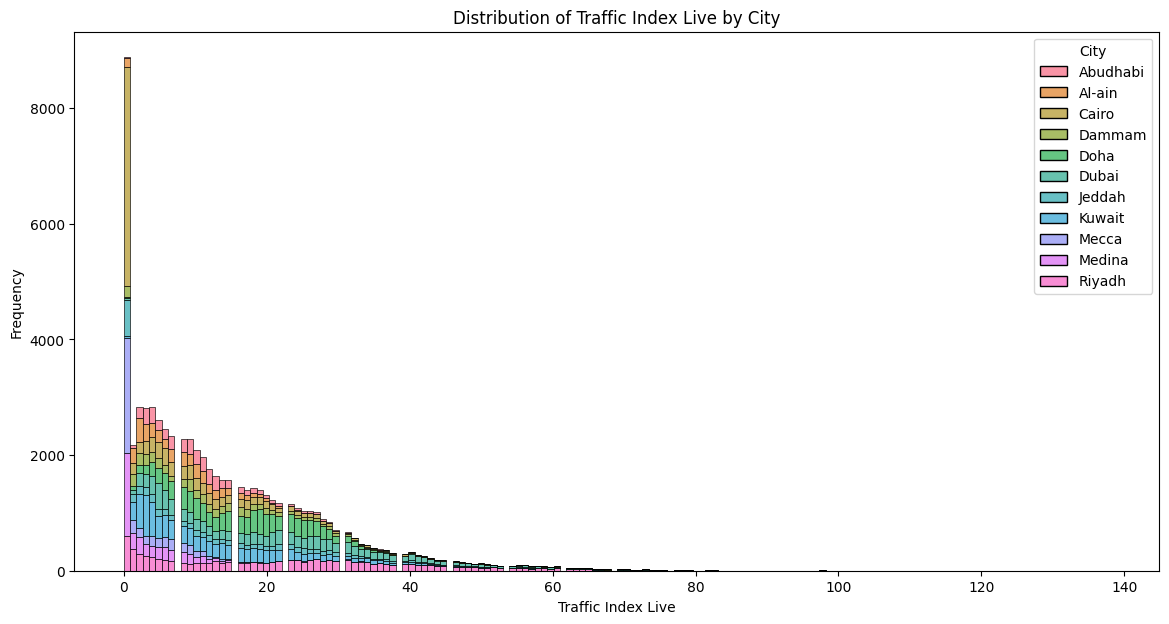

In [72]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='TrafficIndexLive', hue='City', multiple='stack')
plt.title('Distribution of Traffic Index Live by City')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()


array([[<Axes: title={'center': 'TrafficIndexLive'}>,
        <Axes: title={'center': 'JamsCount'}>,
        <Axes: title={'center': 'JamsDelay'}>],
       [<Axes: title={'center': 'JamsLength'}>,
        <Axes: title={'center': 'TrafficIndexWeekAgo'}>,
        <Axes: title={'center': 'TravelTimeHistoric'}>],
       [<Axes: title={'center': 'TravelTimeLive'}>, <Axes: >, <Axes: >]],
      dtype=object)

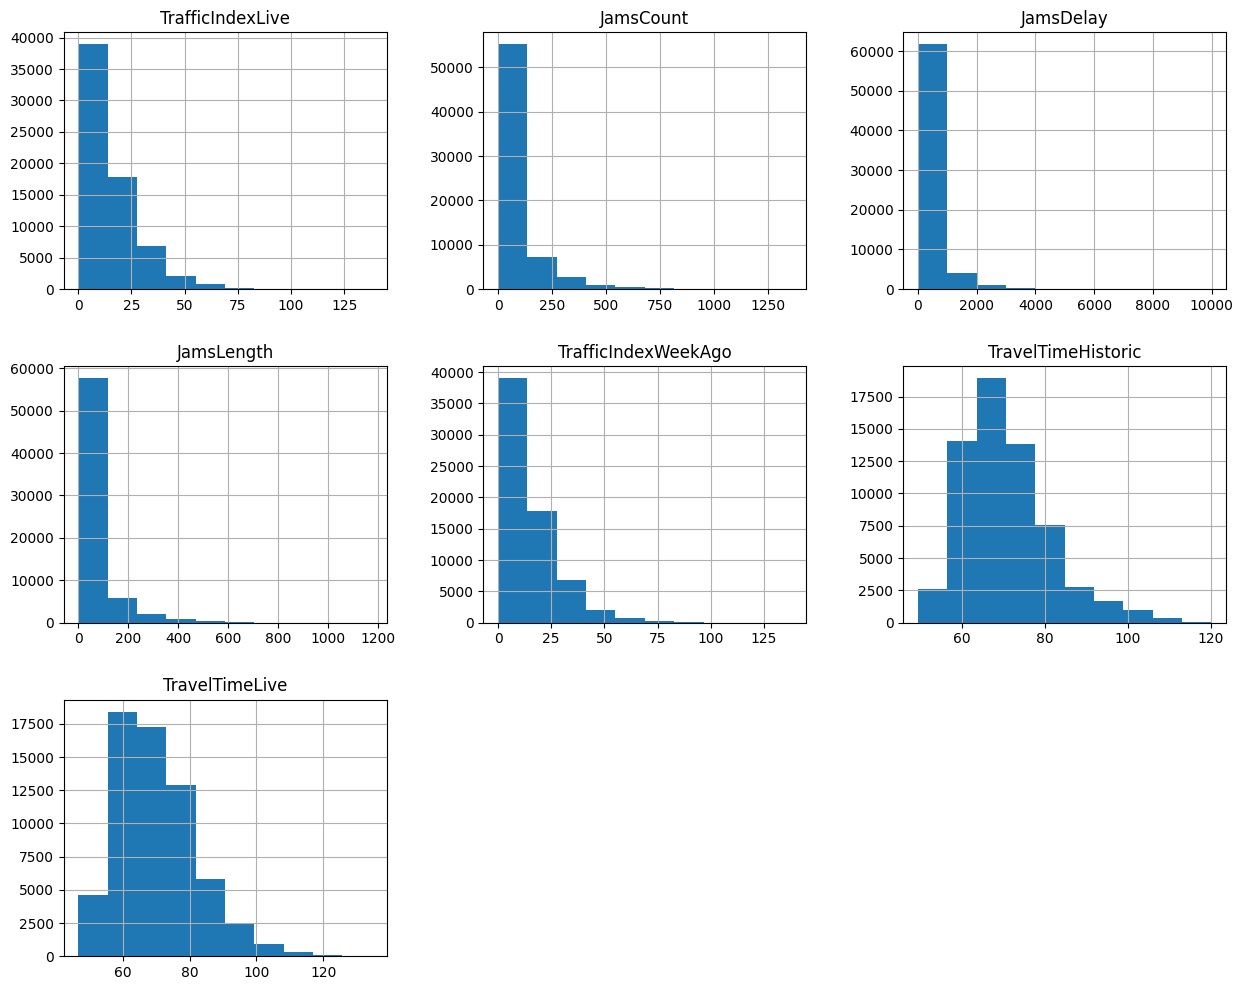

In [73]:
df.hist(figsize=(15,12))

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


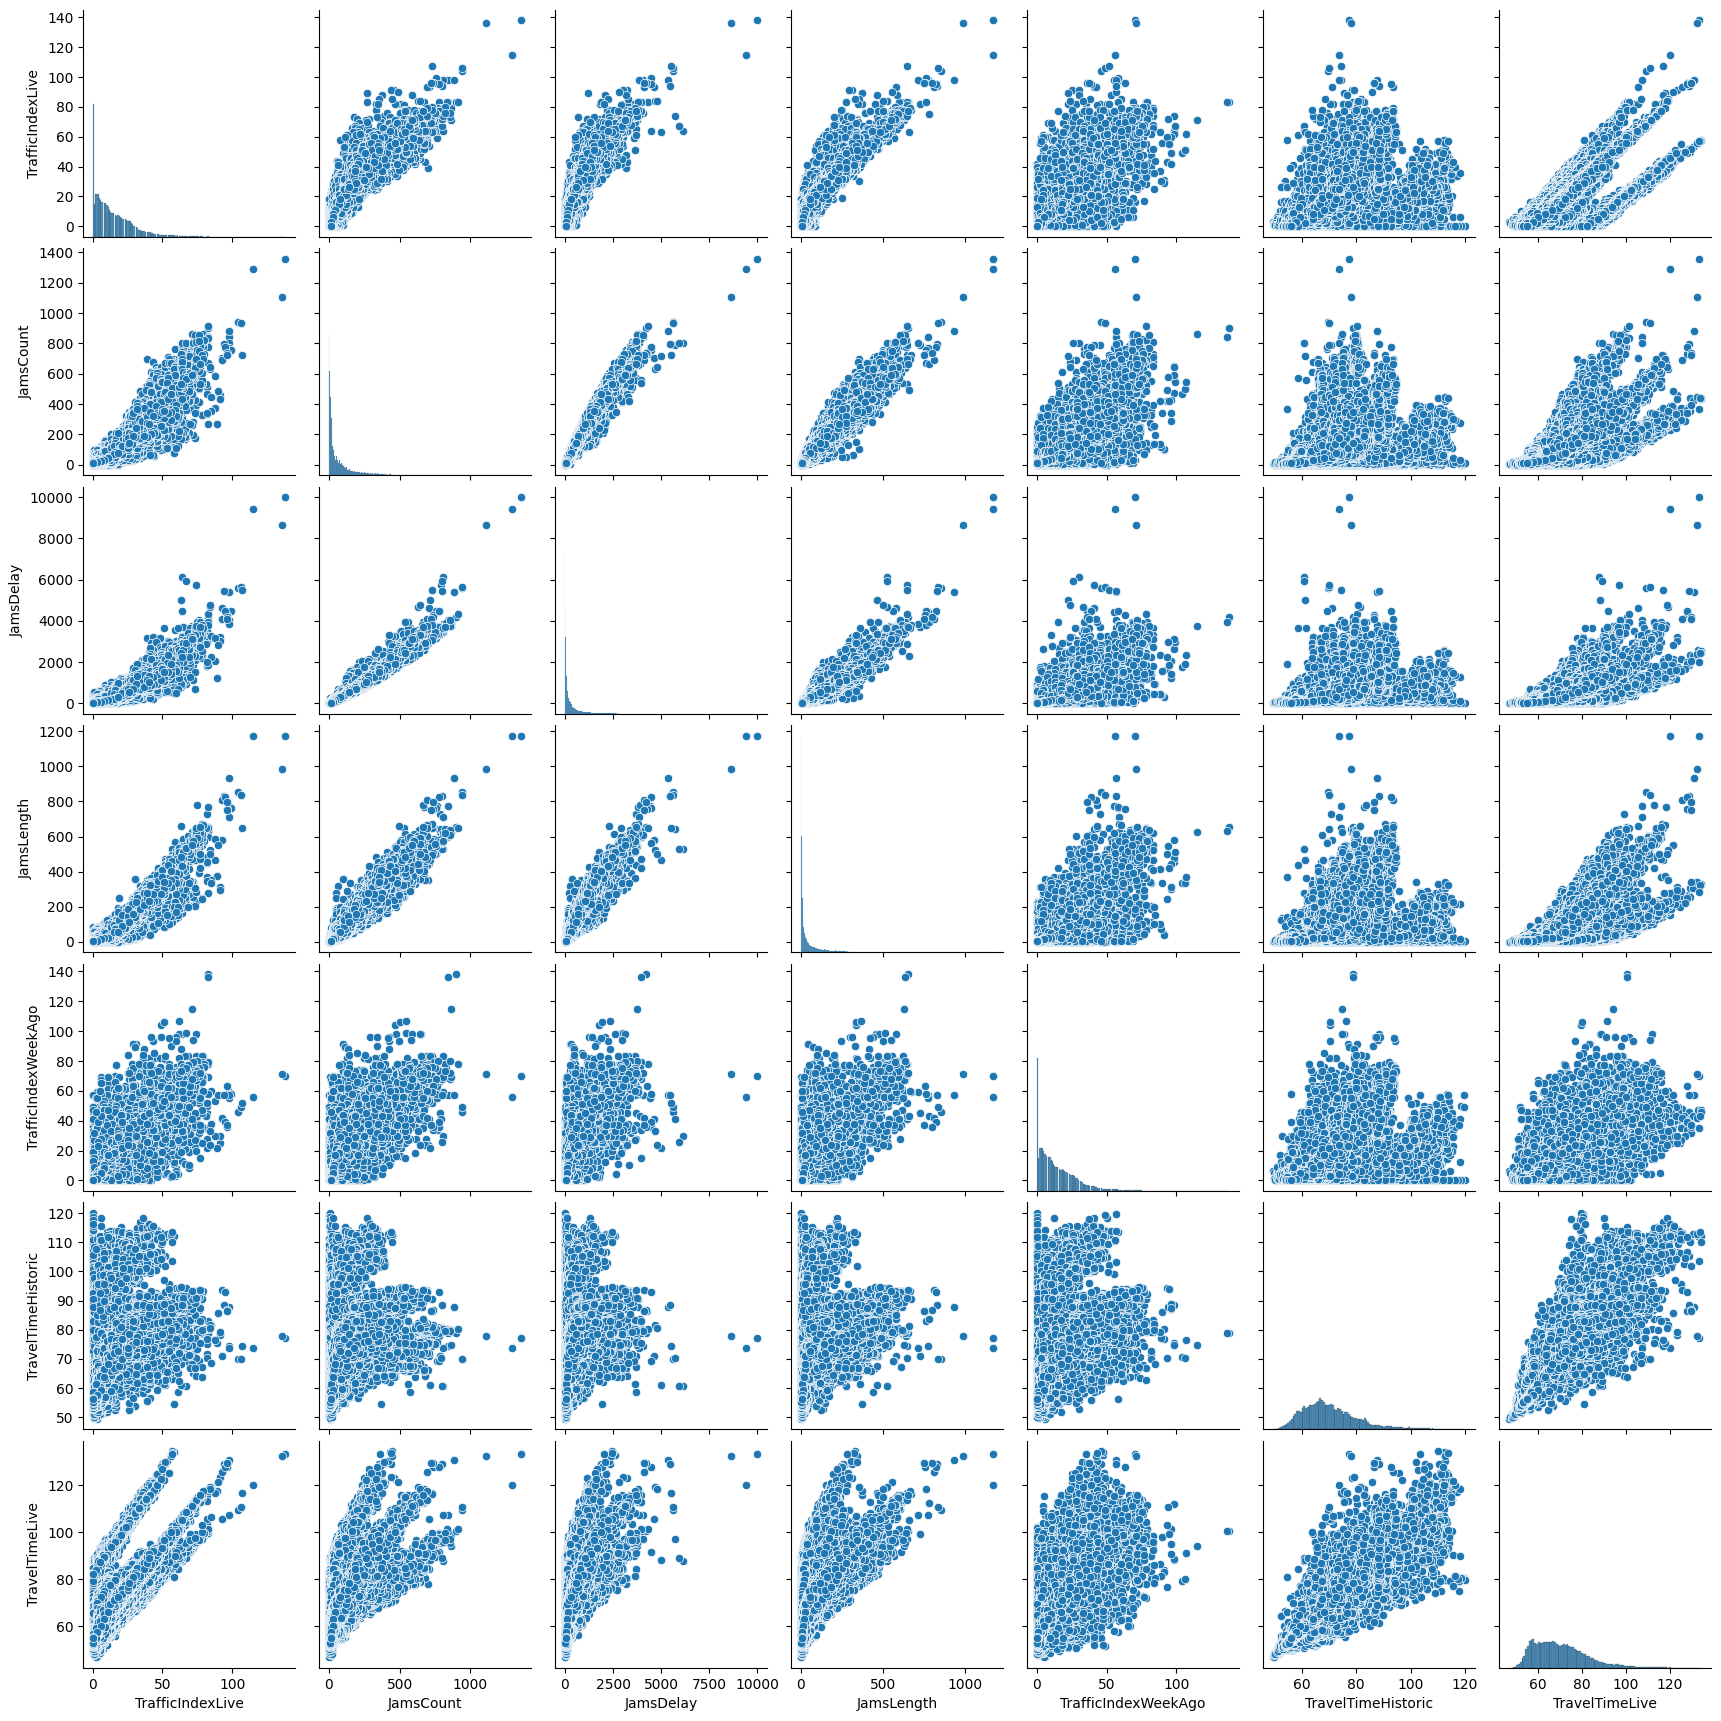

In [74]:
sns.pairplot(df)
plt.show()

<Axes: >

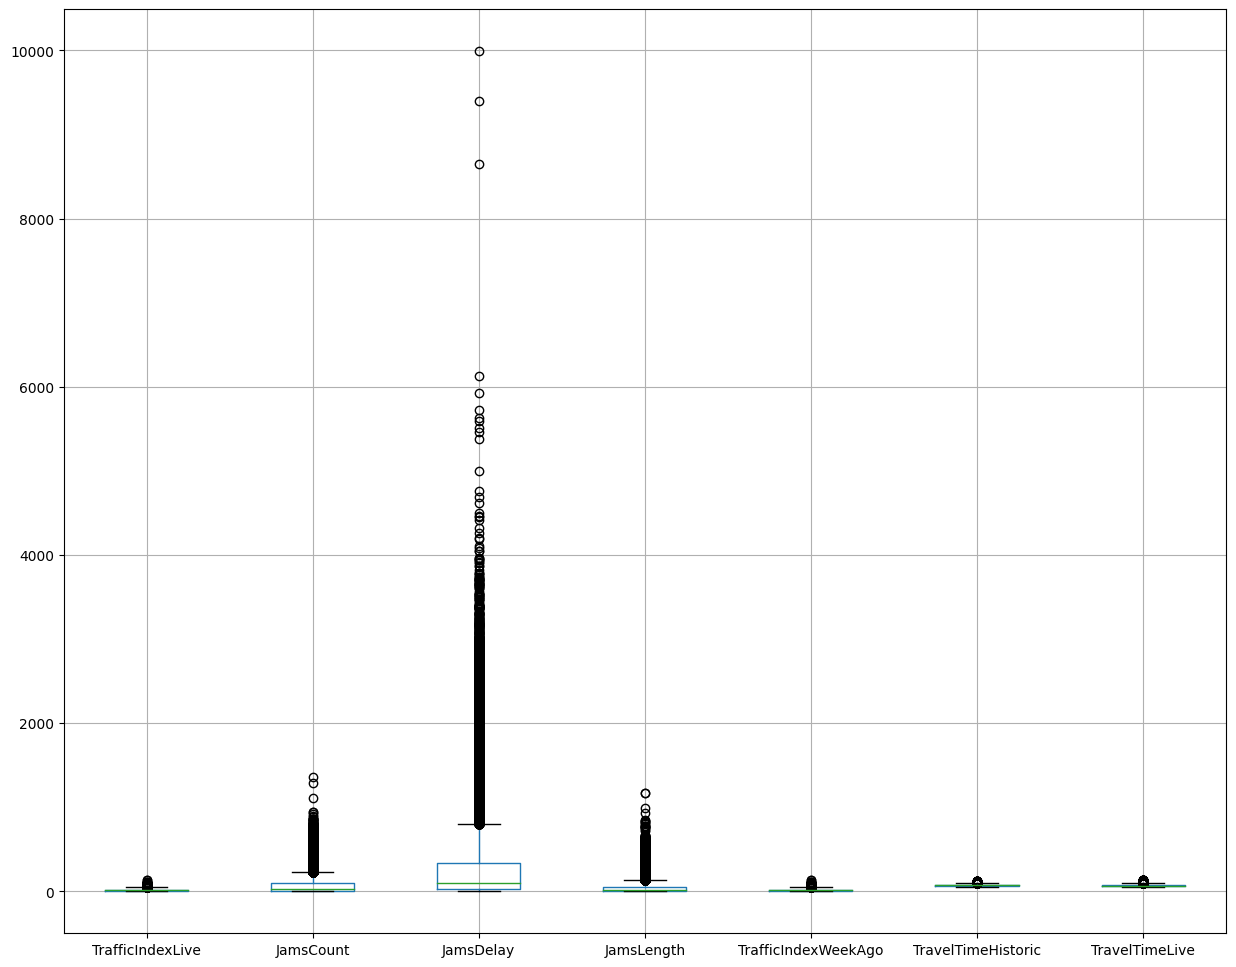

In [75]:
df.boxplot(figsize=(15,12))

In [76]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'TrafficIndexLive')
df = remove_outliers(df, 'JamsCount')
df = remove_outliers(df, 'JamsDelay')
df = remove_outliers(df, 'JamsLength')
df = remove_outliers(df, 'TrafficIndexWeekAgo')
df = remove_outliers(df, 'TravelTimeHistoric')
df = remove_outliers(df, 'TravelTimeLive')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive']] = scaler.fit_transform(df[['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive']])

<Axes: >

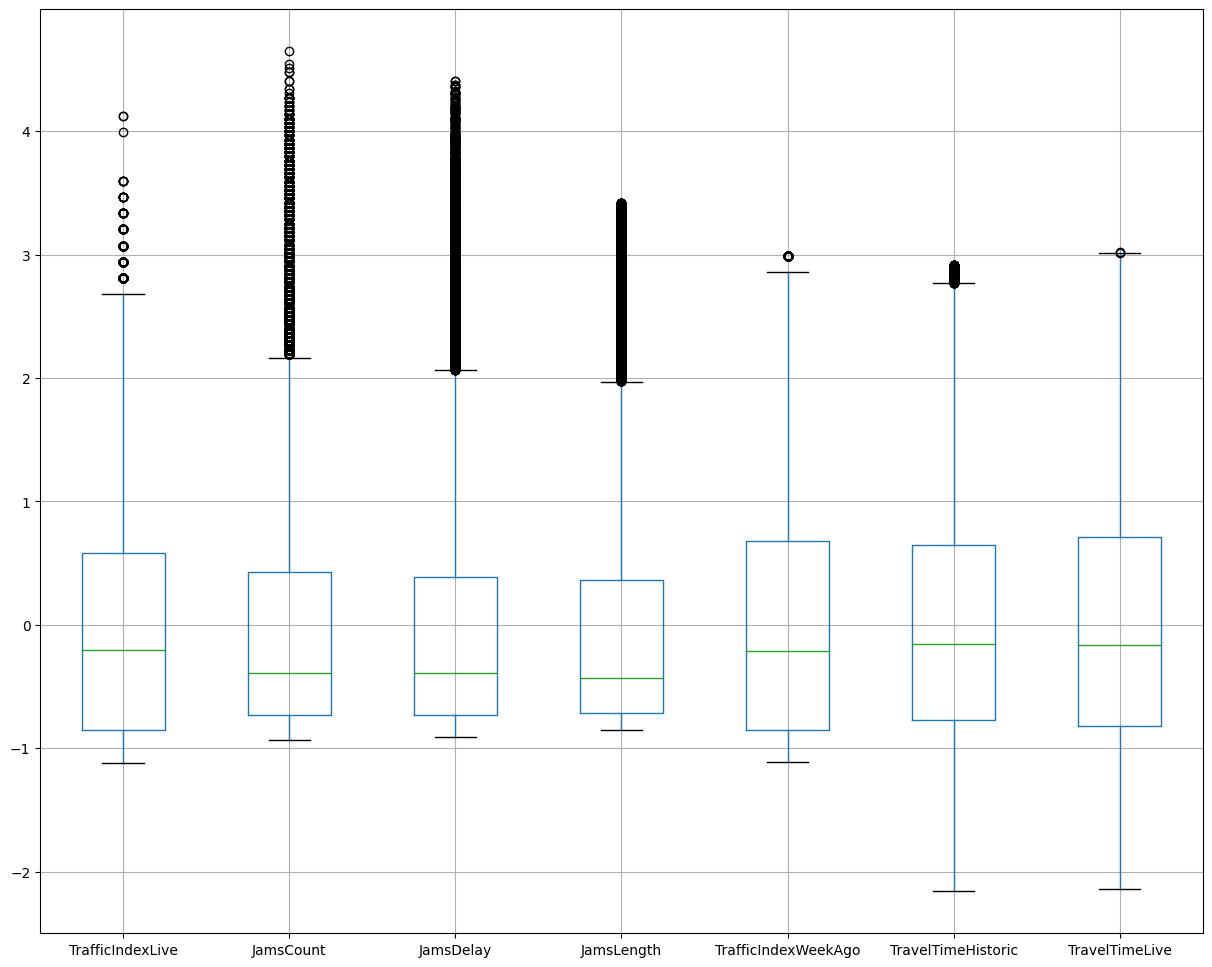

In [77]:
df.boxplot(figsize=(15,12))

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


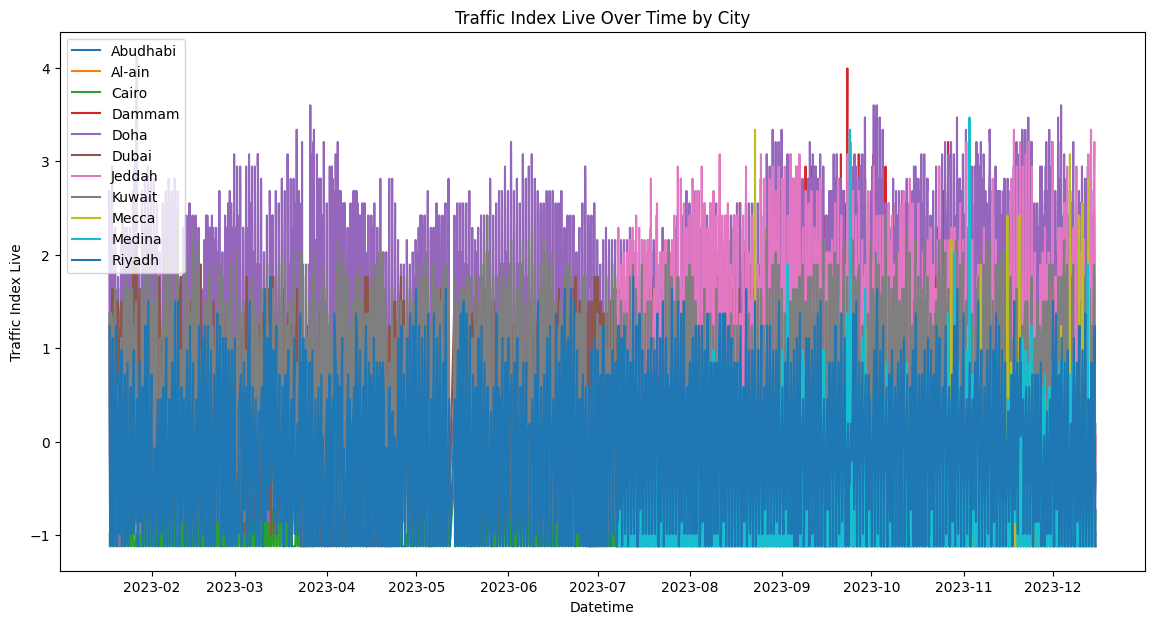

In [78]:
# Convert Datetime to pandas datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

plt.figure(figsize=(14, 7))
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.plot(city_data['Datetime'], city_data['TrafficIndexLive'], label=city)

plt.title('Traffic Index Live Over Time by City')
plt.xlabel('Datetime')
plt.ylabel('Traffic Index Live')
plt.legend(loc='upper left')
plt.show()


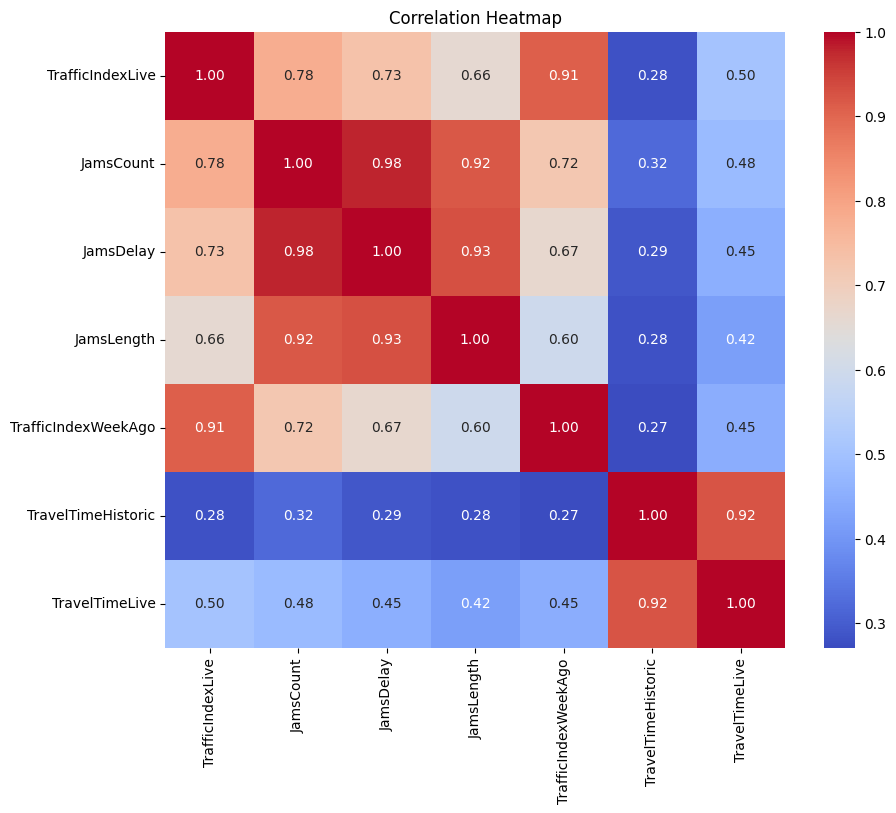

In [79]:
correlation_matrix = df[['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

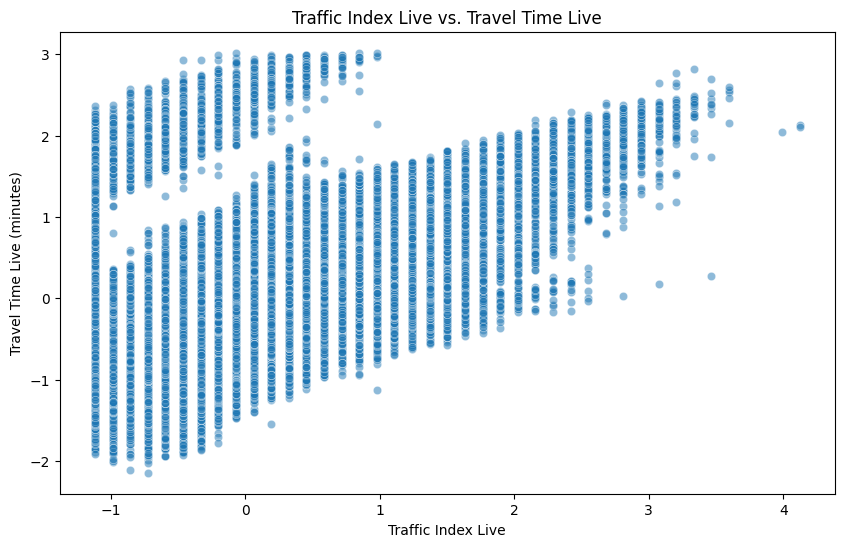

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TrafficIndexLive', y='TravelTimeLive', alpha=0.5)
plt.title('Traffic Index Live vs. Travel Time Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Travel Time Live (minutes)')
plt.show()


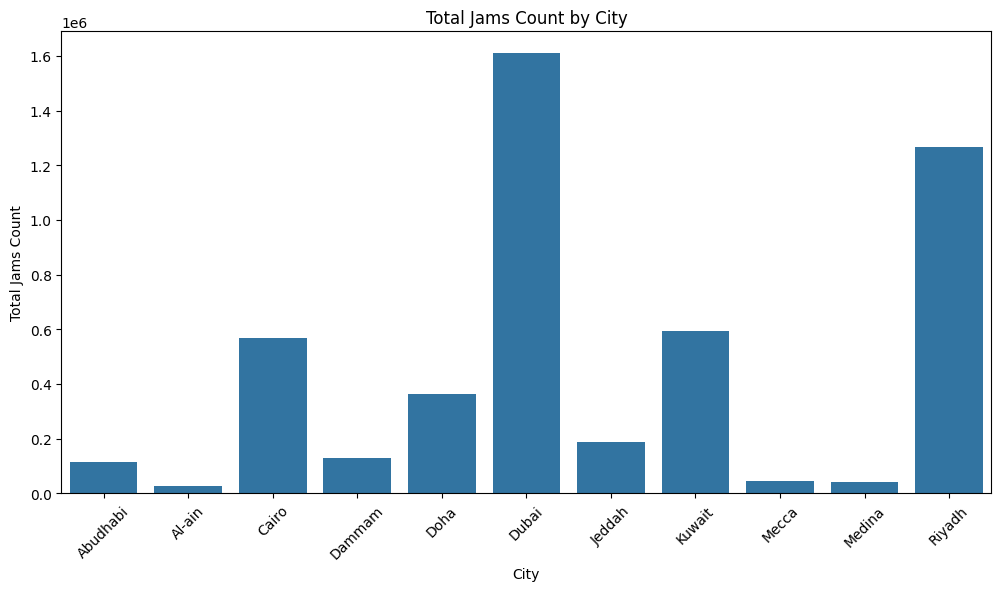

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_data.index, y='total_jams_count', data=grouped_data)
plt.title('Total Jams Count by City')
plt.xlabel('City')
plt.ylabel('Total Jams Count')
plt.xticks(rotation=45)
plt.show()


## 3. Insights and Conclusions

Dubai has the most traffic jams, followed by Riyadh, Kuwait, and Cairo, which have similar levels of traffic. As traffic jams get longer, the delays also increase, showing that longer jams cause more travel time issues.

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>